In [1]:
import numpy as np
import umap
import pickle

In [2]:
file_path = "saved_precalculations/two_layer_mlp_net/class_average_signals.pickle"
with open(file_path, 'rb') as handle:
    class_average_signals = pickle.load(handle)

In [3]:
len(class_average_signals)

10

In [4]:
len(class_average_signals[0])

3

In [21]:
np.transpose(np.stack([class_average_signals[i][2] for i in range(10)]),[1,2,0])

(100, 10, 10)

In [73]:
transposed_array = [[np.transpose(class_average_signals[i][j]) for j in range(len(class_average_signals[0]))] for i in range(len(class_average_signals))]

In [84]:
test =[np.concatenate((transposed_array[i][0], class_average_signals[i][0+1]), axis=1) for i in range(10)]

In [99]:
test2 = np.stack([np.concatenate((transposed_array[i][0], class_average_signals[i][0+1]), axis=1) for i in range(10)])

In [100]:
test2[0].shape

(200, 884)

In [88]:
test[0].shape

(200, 884)

In [5]:
layerwise_neuron_data = []
transposed_array = [[np.transpose(class_average_signals[i][j]) for j in range(len(class_average_signals[0]))] for i in range(len(class_average_signals))]
for index in range(0, len(class_average_signals[0]) - 1):
    layer_array = np.transpose(np.stack([np.concatenate((transposed_array[i][index], class_average_signals[i][index+1]), axis=1) for i in range(10)]), [1, 2, 0])
    layer_array = layer_array.reshape([layer_array.shape[0], np.prod(layer_array.shape[1:])])
    layerwise_neuron_data.append(layer_array)

In [6]:
embeddings_list = []
for layer in layerwise_neuron_data:
    embeddings_list.append(umap.UMAP(n_components=2, metric="euclidean").fit_transform(layer))

In [7]:
from matplotlib import pyplot as plt

In [8]:
np.mean(raw_embeddings, axis=0)

In [18]:
embeddings_list[1].shape

(100, 2)

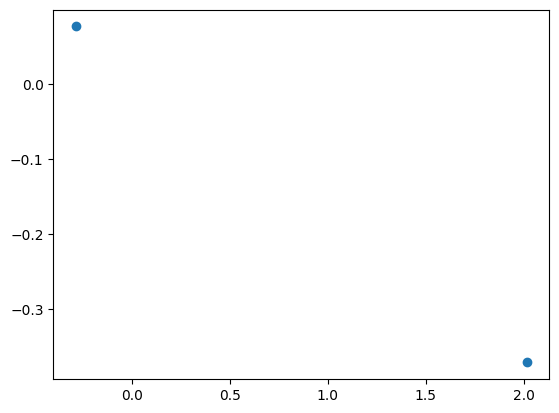

In [12]:
plt.scatter(embeddings_list[1][:][0], embeddings_list[1][:][1])

In [21]:
np.mean(embeddings_list[1])

3.0755996e-07

In [59]:
layerwise_neuron_data[1][1][723]

0.20820883

In [25]:
from scipy.spatial.distance import pdist

In [28]:
coords = umap.UMAP(n_components=2, metric="euclidean").fit_transform(layer_array)
mean = np.mean(coords, axis=0)
coords = coords - mean
dist = pdist(coords, "euclidean")

In [31]:
import umap
import umap.plot

C:\Users\chris\AppData\Local\Programs\Python\Python39\lib\site-packages\umap\plot.py:20: UserWarning: The umap.plot package requires extra plotting libraries to be installed.
    You can install these via pip using

    pip install umap-learn[plot]

    or via conda using

     conda install pandas matplotlib datashader bokeh holoviews colorcet scikit-image
    
  warn(


ImportError: umap.plot requires pandas matplotlib datashader bokeh holoviews scikit-image and colorcet to be installed

In [30]:
umap.plot.interactive(coords)

AttributeError: module 'umap' has no attribute 'plot'

In [27]:
for rep in range(20):
    coords = umap.UMAP(n_components=2, metric="euclidean").fit_transform(layer_array)
    mean = np.mean(coords, axis=0)
    coords = coords - mean
    dist = pdist(coords, "euclidean")
    print(np.mean(dist))

2.257030688006613
2.307342752506187
2.3134186140184947
2.3179354180417304
2.2395593977338573
2.2759552319033105
2.31832333881005
2.3384644574267317
2.3125548490290795
2.2510819219687384
2.2844186901097903
2.2648508276319093
2.326250212233274
2.2216505447450254
2.26159927338089
2.272192716090602
2.284265615463478



KeyboardInterrupt



In [32]:
dist = pdist(coords, "euclidean").shape

(4950,)

(100, 2)

In [11]:
class_average_signals[0][0] 10x3xndarry(784x200)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)